In [39]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import matplotlib.pyplot as plt
import time

plt.style.use('seaborn-poster')

# import plotly.plotly as py
# from plotly.graph_objs import *



In [40]:
N, D_in, H, D_out = 1, 10, 100, 10

In [41]:
dtype=torch.FloatTensor

In [42]:
learning_rate = 1e-6

In [43]:
data_x = np.linspace(0,10,N*D_in).reshape( N, D_in )
data_y = np.linspace(0,10,N*D_in).reshape( N, D_in ) ** 2

In [44]:
ta_x = Variable( torch.from_numpy( data_x ).type(dtype), requires_grad=False )
ta_y = Variable( torch.from_numpy(data_y).type(dtype), requires_grad=False )

ta_w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad = True)
ta_w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad = True)




In [45]:
ta_trial_data = []

for t in range(5000):
    ta_y_pred = ta_x.mm( ta_w1 ).clamp( min=0 ).mm(ta_w2)
    
    ta_loss = (ta_y_pred - ta_y).pow(2).sum()
#     print(t, ta_loss.data[0])
    
    ta_loss.backward()
    
    ta_w1.data -= learning_rate* ta_w1.grad.data
    ta_w2.data -= learning_rate* ta_w2.grad.data
    
    ta_w1.grad.data.zero_()
    ta_w2.grad.data.zero_()
    
    ta_trial_data.append( [t, ta_loss.data[0]] )

# print(t, ta_loss.data[0])



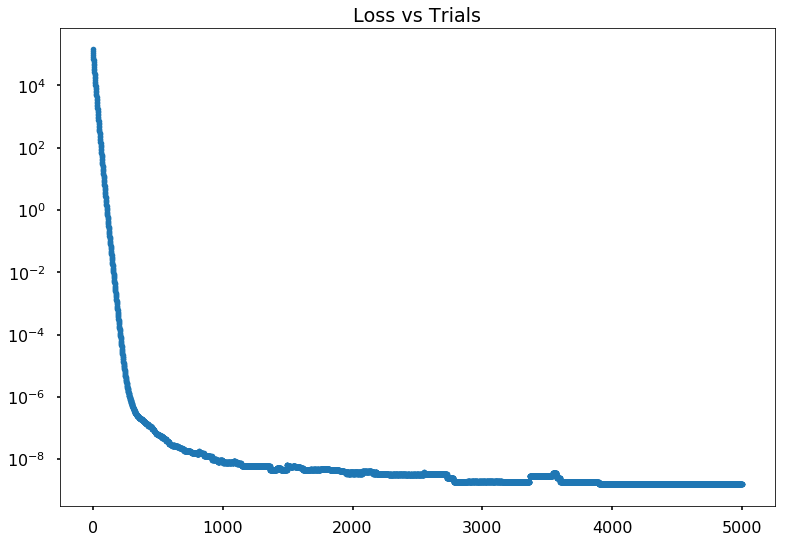

In [46]:

ta_trial_data_plt = np.transpose(ta_trial_data)
plt.semilogy( ta_trial_data_plt[0], ta_trial_data_plt[1], '.' )
plt.title('Loss vs Trials')
plt.show()

In [47]:
print(ta_trial_data[-1])

[4999, 1.5352839000115637e-09]


In [48]:
data_x_plt = data_x.reshape(1, N*D_out )[0]
predicted_y = ta_x.mm( ta_w1 ).clamp( min=0 ).mm(ta_w2).data.numpy().reshape(1,N*D_out)[0]

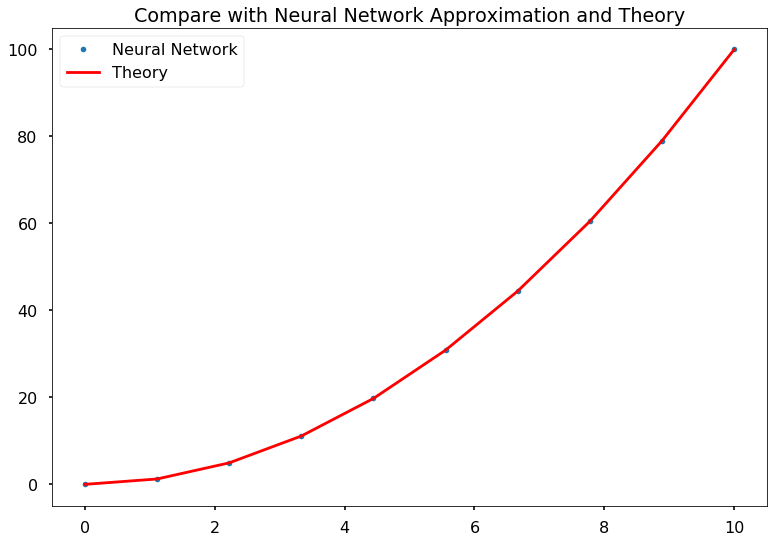

In [49]:
plt.plot( data_x_plt, predicted_y, '.', label='Neural Network' )
plt.plot( data_x_plt, data_x_plt**2, 'r', label='Theory' )
plt.legend()
plt.title('Compare with Neural Network Approximation and Theory')
plt.show()

We need to test with new data